# Functions to evaluate

Linear and binary (logarithmic) search functions.

In [1]:
def linear_search(x, lst):
    for y in lst:
        if x == y:
            return True
    return False

In [2]:
def binary_search(x, lst):
    def recurse(start, end):
        # Inv: start <= end and x might be in lst[start:end].
        if start == end:
            return False
        i = start + (end - start) // 2
        if lst[i] == x:
            return True
        # Inv: start < end	
        elif lst[i] < x:
            return recurse(i, end)
        else:
            return recurse(start, i)
    return recurse(0, len(lst))

# Function for evaluting the running time of a function

The following function wraps a search function and returns another function that, given a size *n* will create a list of that size, search for a random element in it, and return how long it took to do the search.

In [3]:
from time import process_time
from random import randint

def timer(f):
    def evaluator(n):
        lst = list(range(n))
        x = randint(0, n - 1)
        start = process_time()
        f(x, lst)
        end = process_time()
        return end - start
    return evaluator

We can then use this function to make timers for the search functions.

In [4]:
linear_search_timer = timer(linear_search)
binary_search_timer = timer(binary_search)

For our experiments we want a range of list sizes, and because there is some stochasticity in how long a search takes---it will depend on how fast the element is found, which in particular can vary for linear search, we will perform several searches per size.

In [31]:
from numpy import repeat, array

ns = array(range(1000,11000,1000))
repeated_ns = repeat(ns, 10)

In [32]:
linear_search_times = array([linear_search_timer(n) for n in repeated_ns])

In [33]:
binary_search_times = array([binary_search_timer(n) for n in repeated_ns])

# Plotting the results

First we just import some modules we need for plotting and we define some colours we can reuse for the linear and the binary search experiments.

In [34]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

linear_color = sns.xkcd_rgb["amber"]
binary_color = sns.xkcd_rgb["faded green"]

The results are easier to evaluate if we add fitted curves to them. This function fits a line to data points.

In [41]:
from pylab import polyfit
def fit_line(x, y):
    return polyfit(x, y, 1)

We can now try to plot our time experiments together with best fitted lines through the data points.

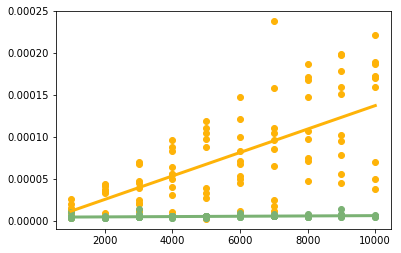

In [43]:
plt.plot(repeated_ns, linear_search_times, 'o', color=linear_color)
plt.plot(repeated_ns, binary_search_times, 'o', color=binary_color)

a,b = fit_line(repeated_ns, linear_search_times)
plt.plot(repeated_ns, a*repeated_ns + b, color=linear_color, lw=3)
a,b = fit_line(repeated_ns, binary_search_times)
plt.plot(repeated_ns, a*repeated_ns + b, color=binary_color, lw=3)

It can be very hard to determine if such time experiments actually demonstrate that the runnig time is what we expect. It is possible to throw statistics at this, but a very simple trick is just to divide the running time with the expected asymptotic running time. If we have the right running time, the data points should then flatten out around a horizontal line.

For the linear search, we would expect the time points dividied by the list length to flatten out horizontally.

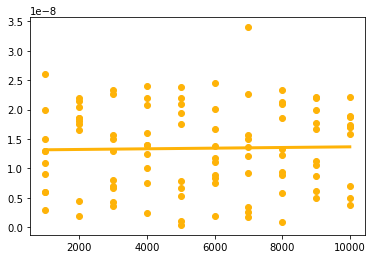

In [46]:
x, y = repeated_ns, linear_search_times / repeated_ns
plt.plot(x, y, 'o', color=linear_color)

a,b = fit_line(x, y)
plt.plot(x, a*x + b, color=linear_color, lw=3)

If we divide the running time by the logarithm of the list length, on the other hand, we would *not* expect to see the linear search time flatten out as a horizontal line. After all, we expect this search to be asymptotically slower than logarithm.

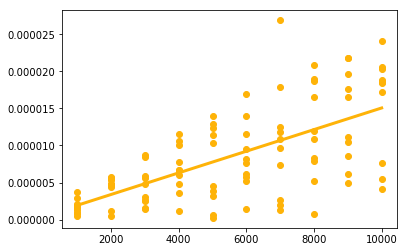

In [49]:
from numpy import log
x, y = repeated_ns, linear_search_times / log(repeated_ns)
plt.plot(x, y, 'o', color=linear_color)

a,b = fit_line(x, y)
plt.plot(x, a*x + b, color=linear_color, lw=3)

We would, on the other hand, expect that the binary search time would flatten out as a horizontal line if we divide the running time by log(n).

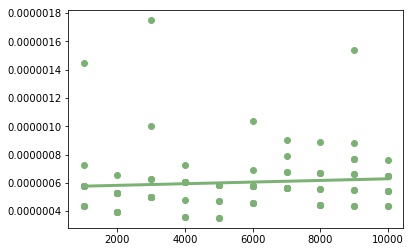

In [48]:
x, y = repeated_ns, binary_search_times / log(repeated_ns)
plt.plot(x, y, 'o', color=binary_color)

a,b = fit_line(x, y)
plt.plot(x, a*x + b, color=binary_color, lw=3)